In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv('./datas/daily_prices.csv', index_col=0)
msci = pd.read_excel('./datas/MSCIeurope.xlsx', index_col=0)

# Exploration

In [3]:
msci.head()

,Ticker,Ticker Yahoo,Nom,Secteur,Equity class,Market Share,Weights,Valeur notionnelle,Actions,ISIN,Currency,Environment Score,Social Score,Governance Score,Total Score
0,NESN,NSRGY,NESTLE SA,Biens de consommation de base,Actions,"EUR 48 274 991,14",4.67,48274991.14,420838,CH0038863350,CHF,8.60,10.80,4.70,24.00
1,ASML,ASML,ASML HOLDING NV,Technologie de l'informatioon,Actions,"EUR 34 906 428,20",3.38,34906428.20,60802,NL0010273215,EUR,3.60,2.60,4.80,11.00
2,ROG,ROG.SW,ROCHE HOLDING PAR AG,Santé,Actions,"EUR 33 188 774,68",3.21,33188774.68,104989,CH0012032048,CHF,2.48,11.54,9.52,23.53
3,MC,MC.PA,LVMH,Biens de consommation cycliques,Actions,"EUR 29 028 191,40",2.81,29028191.40,41457,FR0000121014,EUR,0.76,5.93,5.67,12.37
4,NOVOB,NVO,NOVO NORDISK CLASS B,Santé,Actions,"EUR 28 242 417,87",2.73,28242417.87,247375,DK0060534915,DKK,2.10,13.50,8.40,24.00


In [5]:
msci.describe()

,Weights,Valeur notionnelle,Actions,Environment Score,Social Score,Governance Score,Total Score
count,289.000000,2.890000e+02,2.890000e+02,289.000000,289.00000,289.000000,289.000000
mean,0.310035,3.206017e+06,1.119946e+05,3.976228,6.21301,5.428166,15.685709
std,0.524756,5.423118e+06,2.671428e+05,4.261529,4.35119,3.374846,9.598473
min,0.010000,6.541765e+04,1.600000e+02,0.000000,0.00000,0.000000,0.000000
25%,0.080000,7.821541e+05,1.572500e+04,0.100000,2.83000,3.970000,10.690000
50%,0.140000,1.456141e+06,3.521600e+04,2.100000,6.50000,5.890000,17.210000
75%,0.330000,3.411229e+06,9.225000e+04,6.940000,9.55000,7.500000,22.660000
max,4.670000,4.827499e+07,2.561550e+06,19.530000,17.04000,15.260000,37.380000


In [65]:
msci.head()

,Ticker,Ticker Yahoo,Nom,Secteur,Equity class,Market Share,Weights,Valeur notionnelle,Actions,ISIN,Currency,Environment Score,Social Score,Governance Score,Total Score
0,NESN,NSRGY,NESTLE SA,Biens de consommation de base,Actions,"EUR 48 274 991,14",4.67,48274991.14,420838,CH0038863350,CHF,8.60,10.80,4.70,24.00
1,ASML,ASML,ASML HOLDING NV,Technologie de l'informatioon,Actions,"EUR 34 906 428,20",3.38,34906428.20,60802,NL0010273215,EUR,3.60,2.60,4.80,11.00
2,ROG,ROG.SW,ROCHE HOLDING PAR AG,Santé,Actions,"EUR 33 188 774,68",3.21,33188774.68,104989,CH0012032048,CHF,2.48,11.54,9.52,23.53
3,MC,MC.PA,LVMH,Biens de consommation cycliques,Actions,"EUR 29 028 191,40",2.81,29028191.40,41457,FR0000121014,EUR,0.76,5.93,5.67,12.37
4,NOVOB,NVO,NOVO NORDISK CLASS B,Santé,Actions,"EUR 28 242 417,87",2.73,28242417.87,247375,DK0060534915,DKK,2.10,13.50,8.40,24.00


In [7]:
prices.describe()

,NSRGY,ASML,ROG.SW,MC.PA,NVO,NVS,VTI,SAP,SIE.DE,SNY,...,MF.PA,TIT.MI,ADE.OL,KGX.DE,SALM.OL,UPS,ROCK-B.CO,VSBY.CN,PROX.BR,UN01.DE
count,4511.000000,4511.000000,4524.000000,4585.000000,4511.000000,4511.000000,4511.000000,4511.000000,4556.000000,4511.000000,...,4589.000000,4542.000000,915.000000,2386.000000,3851.000000,4511.000000,4493.000000,945.000000,4591.000000,1581.000000
mean,70.183809,152.930713,229.573784,208.467250,38.580696,65.165910,105.463044,79.035178,90.158521,43.273673,...,90.056913,1.037286,114.032590,54.068675,218.306180,99.240299,1165.168907,0.479772,25.193983,24.303851
std,28.735748,191.564998,62.902689,177.752413,27.797388,17.454025,50.865572,32.244158,23.799325,6.678327,...,28.946723,0.666693,32.844411,18.512765,203.323942,39.226573,709.804247,0.323922,5.241229,8.165608
min,25.379999,12.660000,117.000000,39.195000,4.850000,30.430107,33.700001,29.700001,34.419937,25.020000,...,15.665000,0.171300,56.299999,19.290001,22.000000,38.299999,251.000000,0.105000,9.264000,2.986000
25%,46.625000,29.955000,175.800003,82.680000,12.984000,49.175629,64.895000,51.035000,71.715473,38.705000,...,70.629997,0.568300,87.189999,40.102499,46.099998,72.475002,594.500000,0.230000,22.152500,21.719999
50%,71.410004,87.660004,231.474998,134.750000,34.944000,65.931900,93.370003,73.760002,90.519997,43.570000,...,93.250000,0.852250,105.599998,51.660000,122.500000,93.040001,952.000000,0.410000,26.049999,25.940001
75%,84.410004,184.244995,268.500000,260.899994,52.924999,81.586021,138.285004,105.175003,105.704998,48.855000,...,112.000000,1.114750,143.050003,68.837891,402.949997,110.485001,1617.500000,0.630000,28.702500,29.000000
max,141.119995,889.330017,400.549988,758.000000,126.059998,99.010002,242.970001,169.020004,157.960007,57.459999,...,151.300003,3.160000,188.100006,103.150002,779.500000,232.110001,3429.000000,1.890000,35.820000,42.110001


In [11]:
weights = 0
count = 0
for col in prices.columns:
    if msci.loc[msci['Ticker Yahoo'] == col, 'Total Score'].values== 0:
        weights += msci.loc [msci['Ticker Yahoo'] == col, 'Weights'].values[0]
        count += 1
print(weights, count)


6.539999999999997 57


/tmp/ipykernel_1142/1671262563.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if msci.loc[msci['Ticker Yahoo'] == col, 'Total Score'].values== 0:


In [14]:
weights/msci['Weights'].sum() * 100

7.299107142857141

Il manque des données ESG pour 57 tickers sur 313.
Ils representent 7.29% du poids du portefeuille.

# Adjust the MSCI and the prices

## Adjust the weights

We adjust the weights to sum to 1

In [24]:
msci['Weights'].sum()

89.6

In [39]:
newmsci = msci.copy()
newmsci = newmsci[newmsci['Total Score'] > 0]
total_weights = newmsci['Weights'].sum()
newmsci['Weights'] = newmsci['Weights'] * 100/ total_weights

In [40]:
newmsci['Weights'].sum()

100.0

In [88]:
# save the new msci
newmsci.to_excel('./datas/adjustedMSCIeurope.xlsx')

## Adjust the prices with the exchange rate

In [3]:
newmsci = pd.read_excel('./datas/adjustedMSCIeurope.xlsx', index_col=0)

In [4]:
newmsci['Currency'].value_counts()

EUR    162
CHF     28
SEK     19
DKK     12
NOK      8
USD      2
Name: Currency, dtype: int64

In [5]:
import yfinance as yf

tickers = ['EURCHF=X', 'EURSEK=X', 'EURDKK=X', 'EURNOK=X', 'EURUSD=X']
data = yf.download(
    tickers=tickers,
    threads=True,
    group_by='ticker',
 
)

columns = pd.MultiIndex.from_product([tickers, ['Close']])
data_filter = data[columns]
data_filter.columns = data_filter.columns.droplevel(1)
# from 2005 only 
data_from = pd.Timestamp('2005-01-01')
data_filter = data_filter.loc[data_from:]
data_filter = data_filter.reindex(prices.index)
data_filter.bfill(inplace=True)

[*********************100%***********************]  5 of 5 completed


In [9]:
data_filter.head()

,EURCHF=X,EURSEK=X,EURDKK=X,EURNOK=X,EURUSD=X
Date,,,,,
2005-01-03 00:00:00,1.5452,9.0334,7.4339,8.2355,1.347001
2005-01-04 00:00:00,1.5512,9.0475,7.4350,8.2801,1.328198
2005-01-05 00:00:00,1.5497,9.0285,7.4394,8.2669,1.328004
2005-01-06 00:00:00,1.5470,9.0566,7.4401,8.2690,1.318305
2005-01-07 00:00:00,1.5497,9.0359,7.4401,8.2340,1.306097


In [115]:
'''
tickers = prices.columns
currency_dict = {}
error_tickers = []
for ticker in tickers:
    try:
        currency_dict[ticker] = yf.Ticker(ticker).info['currency']
    except:
        error_tickers.append(ticker)
print(error_tickers)
'''

['DB.1', 'DB.2', 'BMW.DE.1', 'DB.3', '6S=F.1', 'SIE.DE.1', 'PHG.1', 'LISN.SW.1', 'ROG.SW.1', 'PHG.2', 'SRT3.DE.1', 'CS.1', 'HEIA.AS.1', 'ENBR3.SA.1', 'HEN3.DE.1', 'AMKBY.1', '6S=F.2', 'FMS.1', 'VOW3.DE.1', 'BMW.DE.2', 'SCHN.SW.1', 'VOLCAR-B.ST.1', 'IDVA.SG.1', 'TEF.1', 'UHR.SW.1']


In [117]:
'''
# convert dictionary to dataframe
currency_df = pd.DataFrame.from_dict(currency_dict, orient='index', columns=['Currency'])
# add the error tickers to the dataframe with currency = 'N/A'
currency_df = currency_df.append(pd.DataFrame(index=error_tickers, data={'Currency': 'N/A'}))
currency_df.to_excel('./datas/currency.xlsx')
'''

/tmp/ipykernel_1142/1832321183.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  currency_df = currency_df.append(pd.DataFrame(index=error_tickers, data={'Currency': 'N/A'}))


In [7]:
currency_df = pd.read_excel('./datas/currency.xlsx', index_col=0)

In [12]:
currency_df.loc['NSRGY', 'Currency']

'USD'

In [13]:
newprices = prices.copy()
newprices.bfill(inplace=True)
tickers = prices.columns
# convert to EUR currency
for ticker in tickers:
    currency = currency_df.loc[ticker, 'Currency']
    if currency == 'CHF':
        newprices[ticker] = newprices[ticker] / data_filter['EURCHF=X']
    elif currency == 'SEK':
        newprices[ticker] = newprices[ticker] / data_filter['EURSEK=X']
    elif currency == 'DKK':
        newprices[ticker] = newprices[ticker] / data_filter['EURDKK=X']
    elif currency == 'NOK':
        newprices[ticker] = newprices[ticker] / data_filter['EURNOK=X']
    elif currency == 'USD':
        newprices[ticker] = newprices[ticker] / data_filter['EURUSD=X']

newprices.head()
newprices.to_csv('./datas/adjusted_daily_prices.csv')

In [14]:
newprices

,NSRGY,ASML,ROG.SW,MC.PA,NVO,NVS,VTI,SAP,SIE.DE,SNY,...,MF.PA,TIT.MI,ADE.OL,KGX.DE,SALM.OL,UPS,ROCK-B.CO,VSBY.CN,PROX.BR,UN01.DE
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03 00:00:00,19.406073,13.137519,85.102253,56.599998,3.934667,33.440810,43.504051,32.694855,61.000427,29.547120,...,54.200001,3.0600,10.817800,23.540001,4.735596,63.103147,37.261734,0.510,32.770000,10.300
2005-01-04 00:00:00,19.304356,12.883060,84.902008,56.299999,3.858613,33.091171,43.532679,31.870259,60.661266,29.513681,...,53.849998,3.0600,10.759532,23.540001,4.710088,63.183368,37.928716,0.510,32.930000,10.300
2005-01-05 00:00:00,19.382477,12.698572,84.532489,55.450001,3.821526,32.967802,43.237832,31.784551,59.779449,29.088776,...,54.150002,3.0300,10.776711,23.540001,4.717609,63.064586,37.570233,0.510,32.450001,10.300
2005-01-06 00:00:00,19.403709,12.587189,84.744668,55.650002,3.949011,33.026834,43.764542,32.465939,60.341488,28.824900,...,54.400002,3.0600,10.773975,23.540001,4.716411,63.460296,37.365088,0.510,32.160000,10.300
2005-01-07 00:00:00,19.447257,12.592865,84.661544,56.049999,4.004297,32.965059,44.031957,33.198153,60.651573,29.025414,...,54.299999,3.0600,10.819771,23.540001,4.736458,63.930943,37.633902,0.510,32.160000,10.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25 00:00:00,114.593413,568.633946,317.133771,700.200012,114.132238,84.270885,193.637599,106.311409,132.059998,43.610255,...,88.500000,0.2255,7.820303,28.129999,33.084780,175.363385,225.646039,0.185,10.645000,4.802
2022-11-28 00:00:00,115.167279,562.660661,318.084161,698.700012,116.932408,84.571750,191.241346,104.171407,131.539993,43.925611,...,87.050003,0.2228,7.469075,27.809999,32.899034,173.532206,215.567087,0.195,10.485000,5.500
2022-11-29 00:00:00,113.217854,559.487410,315.078951,702.000000,117.296907,84.442175,191.348139,103.348869,133.080002,44.337940,...,87.050003,0.2176,7.365278,27.110001,32.125350,178.714671,211.809981,0.180,10.155000,4.788


# Analysis of ESG

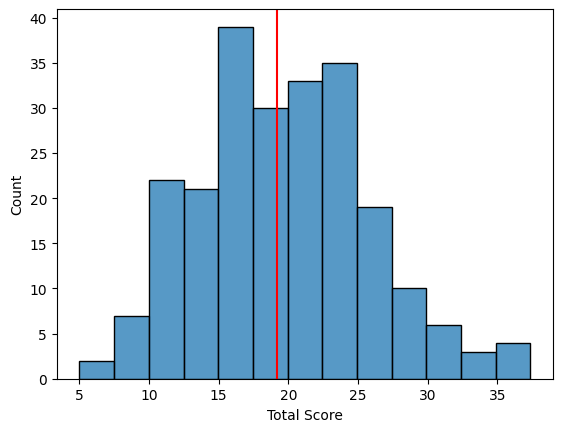

In [133]:
sns.histplot(data=newmsci, x='Total Score')
plt.axvline(newmsci['Total Score'].median(), color='red')
plt.show()

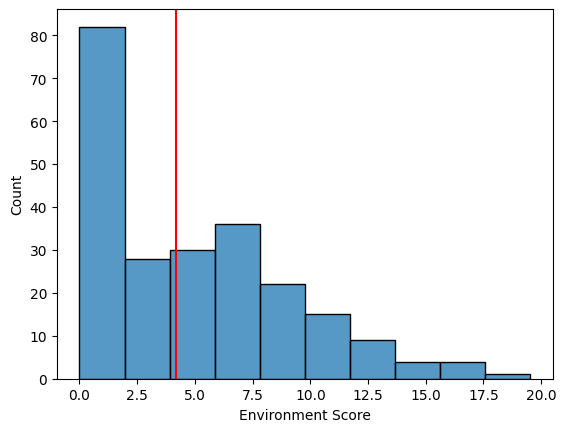

In [134]:
sns.histplot(data=newmsci, x='Environment Score')
plt.axvline(newmsci['Environment Score'].median(), color='red')
plt.show()

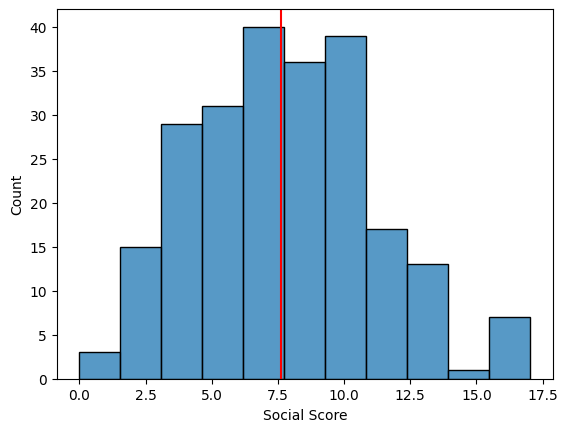

In [135]:
sns.histplot(data=newmsci, x='Social Score')
plt.axvline(newmsci['Social Score'].median(), color='red')
plt.show()

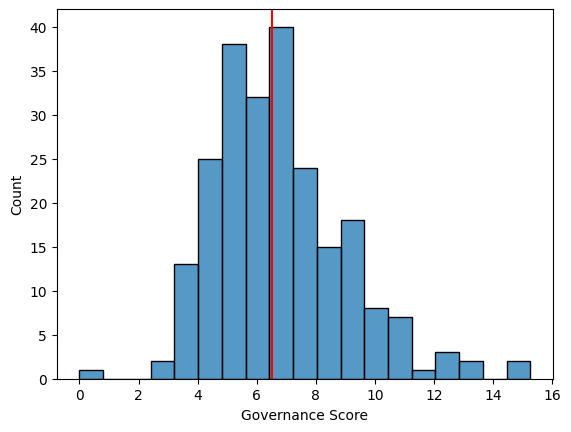

In [136]:
sns.histplot(data=newmsci, x='Governance Score')
plt.axvline(newmsci['Governance Score'].median(), color='red')
plt.show()

# Stats on prices

In [3]:
adjprices = pd.read_csv('./datas/adjusted_daily_prices.csv', index_col=0)

In [4]:
adjprices.head()

,NSRGY,ASML,ROG.SW,MC.PA,NVO,NVS,VTI,SAP,SIE.DE,SNY,...,MF.PA,TIT.MI,ADE.OL,KGX.DE,SALM.OL,UPS,ROCK-B.CO,VSBY.CN,PROX.BR,UN01.DE
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03 00:00:00,19.406073,13.137519,85.102253,56.599998,3.934667,33.440810,43.504051,32.694855,61.000427,29.547120,...,54.200001,3.06,10.817800,23.540001,4.735596,63.103147,37.261734,0.51,32.770000,10.3
2005-01-04 00:00:00,19.304356,12.883060,84.902008,56.299999,3.858613,33.091171,43.532679,31.870259,60.661266,29.513681,...,53.849998,3.06,10.759532,23.540001,4.710088,63.183368,37.928716,0.51,32.930000,10.3
2005-01-05 00:00:00,19.382477,12.698572,84.532489,55.450001,3.821526,32.967802,43.237832,31.784551,59.779449,29.088776,...,54.150002,3.03,10.776711,23.540001,4.717609,63.064586,37.570233,0.51,32.450001,10.3
2005-01-06 00:00:00,19.403709,12.587189,84.744668,55.650002,3.949011,33.026834,43.764542,32.465939,60.341488,28.824900,...,54.400002,3.06,10.773975,23.540001,4.716411,63.460296,37.365088,0.51,32.160000,10.3
2005-01-07 00:00:00,19.447257,12.592865,84.661544,56.049999,4.004297,32.965059,44.031957,33.198153,60.651573,29.025414,...,54.299999,3.06,10.819771,23.540001,4.736458,63.930943,37.633902,0.51,32.160000,10.3


In [12]:
returns = adjprices.pct_change().iloc[1:]

In [6]:
from stats_utils import *

In [13]:
returns.iloc[:,0]

Date
2005-01-04 00:00:00   -0.019369
2005-01-05 00:00:00   -0.014320
2005-01-06 00:00:00   -0.008771
2005-01-07 00:00:00    0.000451
2005-01-10 00:00:00    0.013300
                         ...   
2022-11-25 00:00:00    0.000781
2022-11-28 00:00:00   -0.010505
2022-11-29 00:00:00   -0.005640
2022-11-30 00:00:00    0.052761
2022-12-01 00:00:00    0.000081
Name: ASML, Length: 4638, dtype: float64

In [19]:
all_stats = None
for i, ticker in enumerate(returns.columns):
    p = adjprices[ticker].dropna()
    r = p.pct_change().iloc[1:]
    if r.shape[0] > 1:
        stats = summary_stats(ticker, r)
        all_stats = pd.concat([all_stats, stats], axis=0) if all_stats is not None else stats

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  skewness = (1 / n * np.sum(diffx**3)) / (1 / n * np.sum(diffx**2))**(3 / 2.)
/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  kurtosis = (1 / n * np.sum(diffx**4)) / (1 / n * np.sum(diffx**2))**2
/workspaces/Portfolio-Construction/stats_utils.py:50: RuntimeWarning: divide by zero encountered in double_scalars
  return ann_ex_ret/ann_vol
/workspaces/Portfolio-Construction/stats_utils.py:65: RuntimeWarning: invalid value encountered in double_scalars
  return ann_ret/dd


In [21]:
all_stats.to_excel('./datas/summary_stats.xlsx')